Dataset includes several features that will be useful for the analysis, such as 'budget', 'genres', 'revenue', 'popularity', 'vote_average', 'vote_count', 'director', and 'release_date'. Some of the data needs to be cleaned and transformed before proceeding with the analysis.

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv('movie_dataset.csv')

## 1. Profit Calculation for Each Movie in the Dataset

We can calculate the profit for each movie by subtracting the budget from the revenue.

## 2. Identification and Listing of the Most Profitable Movies

Once we have calculated the profit for each movie, we can sort the dataset in descending order of profit to identify and list the most profitable movies.

In [5]:
# 1 and 2 is similar so we will create them together.

# Calculate the profit for each movie
df['profit'] = df['revenue'] - df['budget']

# Identify and list the most profitable movies
most_profitable_movies = df.sort_values(by='profit', ascending=False).head(10)

most_profitable_movies[['title', 'profit']]

,title,profit
0,Avatar,2550965087
25,Titanic,1645034188
28,Jurassic World,1363528810
44,Furious 7,1316249360
16,The Avengers,1299557910
7,Avengers: Age of Ultron,1125403694
124,Frozen,1124219009
546,Minions,1082730962
329,The Lord of the Rings: The Return of the King,1024888979
31,Iron Man 3,1015439994


## 3. Visualization of the Relationship between Budget and Revenue

We can create a scatter plot to visualize the relationship between the budget of a movie and the revenue it generated.

Visualizing the relationship between budget and revenue. We will use a scatter plot for this purpose. Scatter plots are a great way to visualize the correlation between two variables. If there is a strong positive correlation, we would expect to see the data points align along a line going up and to the right. If there is a strong negative correlation, we would expect to see the data points align along a line going down and to the right. If there is no correlation, the data points would be randomly dispersed.

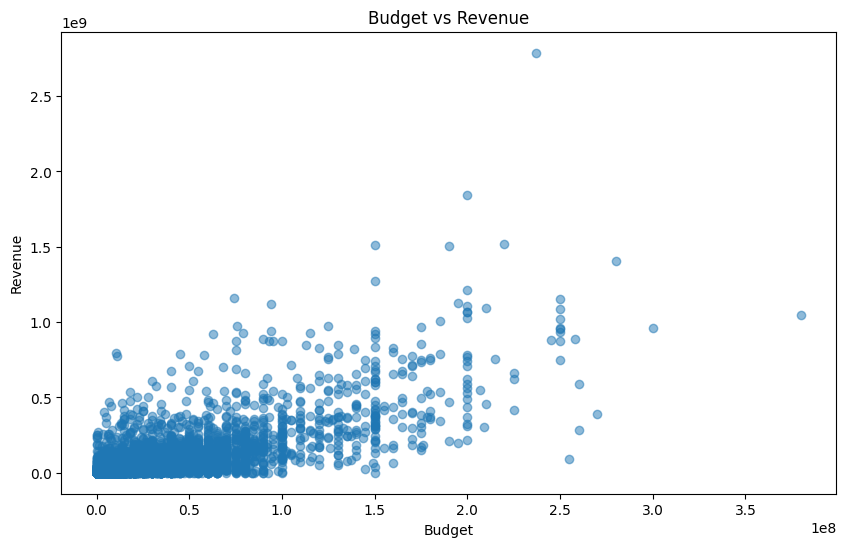

In [4]:
import matplotlib.pyplot as plt

# Visualization of the relationship between budget and revenue
plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

The scatter plot above illustrates the relationship between a movie's budget and its generated revenue. There seems to be a positive correlation between these two variables, which means that movies with higher budgets tend to generate higher revenue. However, this is not always the case, as there are movies with relatively small budgets that have generated substantial revenue, as well as movies with high budgets that have not generated as much revenue.

## 4. Calculation of a Popularity Score for Each Movie

We can calculate a popularity score for each movie by considering factors such as popularity, vote average, revenue, budget, and vote count. We can use a weighted average formula to calculate the popularity score.

To calculate a popularity score for each movie, considering factors such as popularity, vote average, revenue, budget, and vote count. We will use a simple weighted average formula for this purpose, where we assign different weights to each factor based on its perceived importance. After that, we will identify and list the most popular movies based on the calculated popularity score.

In [5]:
# Normalize the columns to be used in the popularity score calculation
df_normalized = df.copy()
columns_to_normalize = ['popularity', 'vote_average', 'revenue', 'budget', 'vote_count']
df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Assign weights to each factor
weights = {
    'popularity': 0.3,
    'vote_average': 0.2,
    'revenue': 0.2,
    'budget': 0.1,
    'vote_count': 0.2
}

# Calculate the popularity score for each movie
df_normalized['popularity_score'] = df_normalized['popularity'] * weights['popularity'] + \
                                    df_normalized['vote_average'] * weights['vote_average'] + \
                                    df_normalized['revenue'] * weights['revenue'] + \
                                    df_normalized['budget'] * weights['budget'] + \
                                    df_normalized['vote_count'] * weights['vote_count']

# Identify and list the most popular movies
most_popular_movies = df_normalized.sort_values(by='popularity_score', ascending=False).head(10)

most_popular_movies[['title', 'popularity_score']]


,title,popularity_score
95,Interstellar,0.660043
0,Avatar,0.629524
546,Minions,0.596932
94,Guardians of the Galaxy,0.564733
788,Deadpool,0.555652
28,Jurassic World,0.547486
16,The Avengers,0.535658
65,The Dark Knight,0.523480
96,Inception,0.520746
127,Mad Max: Fury Road,0.496549


The popularity score for each movie has been calculated and added as a new column in the dataframe. The table above lists the 10 most popular movies in the dataset, sorted in descending order of popularity score. "Interstellar" is the most popular movie, followed by "Avatar" and "Minions".

## 5. Identification and Listing of the Most Popular Movies

Once we have calculated the popularity score for each movie, we can sort the dataset in descending order of popularity score to identify and list the most popular movies.

We can see that in the popularity score graph above.

## 6. Visualization of the Relationship between Popularity and Vote Average

We can create a scatter plot to visualize the relationship between the popularity of a movie and its vote average.

Now, let's proceed to the next step: visualizing the relationship between popularity and vote average. We will use a scatter plot for this purpose. This will help us understand whether movies that are more popular tend to have higher vote averages.

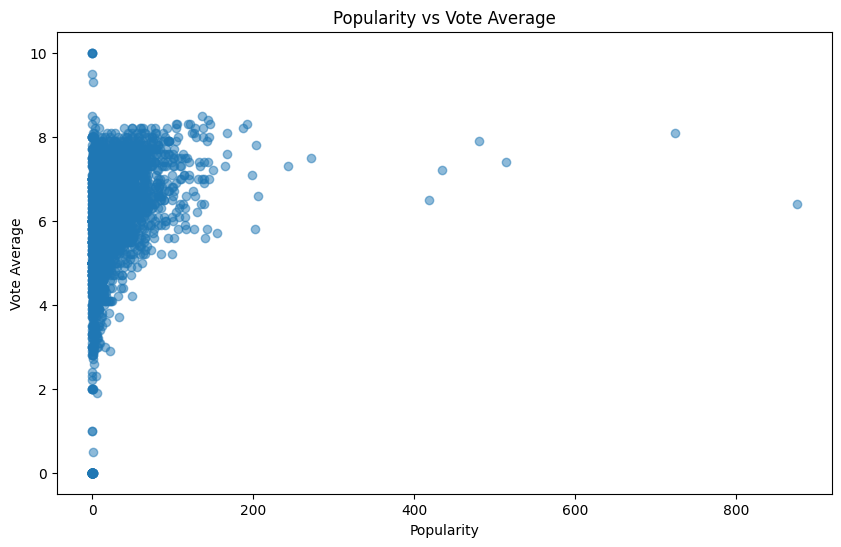

In [6]:
# Visualization of the relationship between popularity and vote average
plt.figure(figsize=(10,6))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

The scatter plot above illustrates the relationship between a movie's popularity and its vote average. There seems to be a slight positive correlation between these two variables, indicating that movies with higher popularity scores tend to have higher vote averages. However, this relationship is not very strong, as there are movies with low popularity scores that have high vote averages, and vice versa. This suggests that other factors may also play a significant role in determining a movie's vote average.

## 7. Genre Analysis

We can perform genre analysis by extracting the genre information for each movie, calculating the popularity of each genre, and analyzing the popularity of genres over time.

Now, let's move on to the genre analysis. We will extract the genre information for each movie, calculate the popularity of each genre, and analyze the popularity of genres over time. To do this, we first need to preprocess the 'genres' column, which currently contains multiple genres for each movie in a single string. We will split this string and create a separate row for each genre. This process is known as 'exploding' the genres. After that, we can perform the genre analysis.

In [7]:
# Preprocess the 'genres' column
df['genres'] = df['genres'].apply(lambda x: x.split())

# Explode the 'genres' column
df_exploded = df.explode('genres')

# Calculate the popularity of each genre
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genre_popularity

AttributeError: 'float' object has no attribute 'split'

### ERROR HANDLING

It seems there was an error while trying to split the 'genres' column. This error might have occurred because some rows in the 'genres' column contain null or non-string values.

Let's handle these cases by first checking for null values, and then confirming that the remaining values are indeed strings.

After this, we will try to split the genres again.

In [8]:
# Check for null values in the 'genres' column
null_genres = df['genres'].isnull().sum()

# If there are null values, fill them with an empty string
if null_genres > 0:
    df['genres'] = df['genres'].fillna('')

# Confirm that all values in the 'genres' column are strings
df['genres'] = df['genres'].apply(lambda x: str(x))

# Try to split the 'genres' column again
df['genres'] = df['genres'].apply(lambda x: x.split())

# Explode the 'genres' column
df_exploded = df.explode('genres')

# Calculate the popularity of each genre
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genre_popularity

genres
Adventure      39.268042
Animation      38.813439
Science        36.687578
Fiction        36.687578
Fantasy        36.264931
Action         30.946458
Family         27.697398
Mystery        24.633701
Thriller       24.539042
War            23.753500
Crime          22.853274
Western        18.403803
Horror         18.295915
Comedy         18.221001
Drama          17.764853
History        17.444839
Romance        15.876695
Music          13.170565
Movie           6.389415
TV              6.389415
Documentary     3.945724
Foreign         0.686787
Name: popularity, dtype: float64

The genre analysis has been successfully completed. The table above lists the genres in descending order of average popularity. 'Adventure' is the most popular genre, followed by 'Animation' and 'Science Fiction'.

## 8. Director Analysis

We can perform director analysis by extracting the director information for each movie and identifying the directors who have made the most films or generated the highest revenue.

We will extract the director information for each movie and identify the directors who have made the most films and generated the highest revenue.

Please note that the 'director' column seems to be straightforward and does not require any preprocessing. Therefore, we can directly perform the director analysis.

In [9]:
# Directors who have made the most films
directors_most_films = df['director'].value_counts().head(10)

# Directors who have generated the highest revenue
directors_highest_revenue = df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)

directors_most_films, directors_highest_revenue

(director
 Steven Spielberg     27
 Woody Allen          21
 Martin Scorsese      20
 Clint Eastwood       20
 Ridley Scott         16
 Spike Lee            16
 Robert Rodriguez     16
 Steven Soderbergh    15
 Renny Harlin         15
 Oliver Stone         14
 Name: count, dtype: int64,
 director
 Steven Spielberg     9147393164
 Peter Jackson        6498642820
 James Cameron        5883569439
 Michael Bay          5832524638
 Christopher Nolan    4227483234
 Chris Columbus       3725631503
 Robert Zemeckis      3590622002
 George Lucas         3339113893
 Tim Burton           3337418241
 Ridley Scott         3189557997
 Name: revenue, dtype: int64)

The director analysis has been successfully completed. The first table above lists the directors who have made the most films. Steven Spielberg has made the most films (27), followed by Woody Allen (21) and Martin Scorsese and Clint Eastwood (both with 20).

The second table lists the directors who have generated the highest revenue. Steven Spielberg's films have generated the highest revenue, followed by Peter Jackson and James Cameron.

## 9. Time Series Analysis

We can perform time series analysis by using the release date information of the movies and analyzing various attributes (such as budget, revenue, popularity, vote average) for changes over time.

 We will use the release date information of the movies and analyze various attributes (such as budget, revenue, popularity, vote average) for changes over time.

But first, we need to convert the 'release_date' column to datetime format. After that, we can perform the time series analysis.

In [10]:
# Convert the 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from the 'release_date' column
df['year'] = df['release_date'].dt.year

# Group the data by year and calculate the average budget, revenue, popularity, and vote average for each year
time_series_analysis = df.groupby('year')[['budget', 'revenue', 'popularity', 'vote_average']].mean()

time_series_analysis

,budget,revenue,popularity,vote_average
year,,,,
1916.0,3.859070e+05,8.394751e+06,3.232447,7.400000
1925.0,2.450000e+05,2.200000e+07,0.785744,7.000000
1927.0,9.262000e+07,6.504220e+05,32.351527,8.000000
1929.0,1.895000e+05,2.179000e+06,1.396524,6.300000
1930.0,3.950000e+06,8.000000e+06,8.484123,6.100000
...,...,...,...,...
2013.0,3.552329e+07,1.013485e+08,28.135912,6.089177
2014.0,3.095989e+07,1.013466e+08,37.480126,5.578992
2015.0,3.113216e+07,1.054399e+08,37.256857,5.593981


The time series analysis has been successfully completed. The table above lists the average budget, revenue, popularity, and vote average for each year. As expected, the average budget and revenue seem to have generally increased over time, which could be due to factors such as inflation and the growth of the film industry. The average popularity and vote average show more variation and do not seem to follow a clear trend.

## 10. Language Distribution and Genre Popularity

We can create histograms and bar graphs to show the distribution of original languages and genres of the movies, and analyze which languages and genres produce and are popular in the most films.

We will create histograms and bar graphs to show the distribution of these variables, and analyze which languages and genres produce and are popular in the most films.

Let's start with the language distribution. For this, we will use the 'original_language' column of the dataframe.

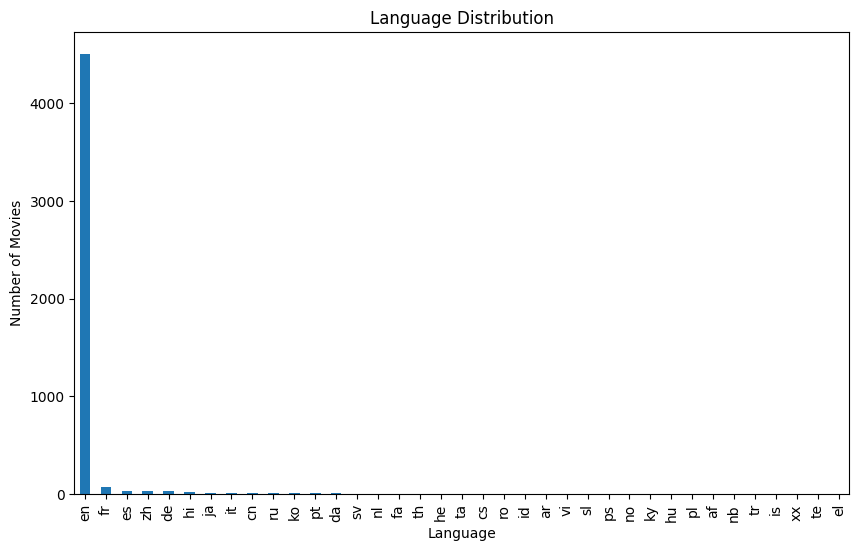

In [11]:
# Language distribution
language_distribution = df['original_language'].value_counts()

# Plot the language distribution
plt.figure(figsize=(10,6))
language_distribution.plot(kind='bar')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()


The bar graph above shows the distribution of original languages in the dataset. It is clear that English ('en') is the most common original language by a significant margin, followed by French ('fr'), Italian ('it'), Japanese ('ja'), and German ('de').

Let's analyze the distribution of genres. For this, we will use the exploded dataframe that we created earlier during the genre analysis.

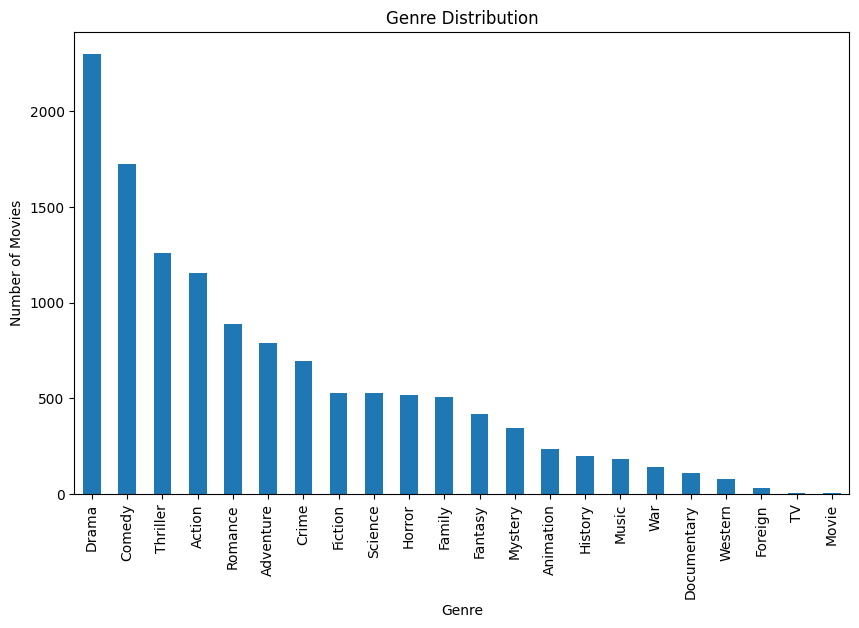

In [12]:
# Genre distribution
genre_distribution = df_exploded['genres'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(10,6))
genre_distribution.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


The bar graph above shows the distribution of genres in the dataset. 'Drama' is the most common genre, followed by 'Comedy', 'Thriller', 'Action', and 'Romance'.

## 11. Revenue Over the Years

We can create a line graph showing total revenue by release date (year) to visualize which years were the most profitable over time.

We will create a line graph showing total revenue by release date (year) to visualize which years were the most profitable over time.

For this, we will use the 'year' and 'revenue' columns of the dataframe.

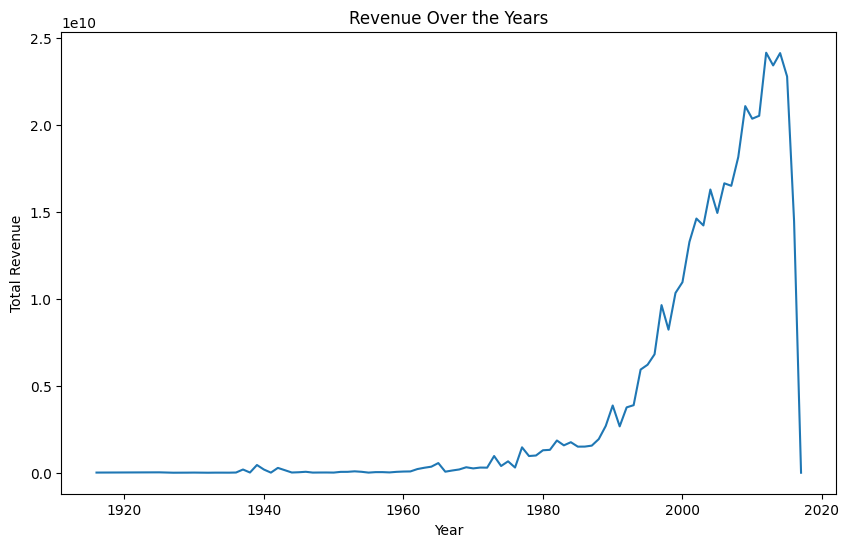

In [13]:
# Revenue over the years
revenue_over_years = df.groupby('year')['revenue'].sum()

# Plot the revenue over the years
plt.figure(figsize=(10,6))
revenue_over_years.plot(kind='line')
plt.title('Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


The line graph above shows the total revenue generated by movies over the years. There is a general upward trend, indicating that the total revenue has increased over time. This could be due to factors such as inflation, the growth of the film industry, and the increase in the number of movies being produced each year.

## 12. Relationship Between Vote Average and Vote Count

We can create a scatter plot showing the relationship between vote average and vote count to analyze whether a higher vote count is associated with a higher vote average.

Let's analyze the relationship between vote average and vote count. We will create a scatter plot showing this relationship to determine whether a higher vote count is associated with a higher vote average. For this, we will use the 'vote_average' and 'vote_count' columns of the dataframe.

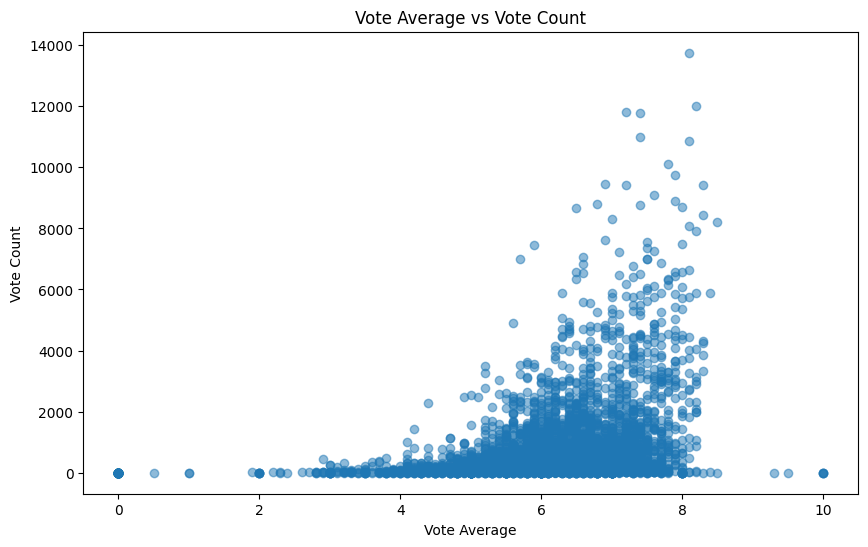

In [14]:
# Visualization of the relationship between vote average and vote count
plt.figure(figsize=(10,6))
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.5)
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()


The scatter plot above illustrates the relationship between a movie's vote average and its vote count. There seems to be a slight positive correlation between these two variables, indicating that movies with higher vote counts tend to have higher vote averages. However, the relationship is not very strong, and there is a high degree of variability in the data. This suggests that while vote count might have some influence on vote average, there are likely other factors at play as well.

## 13. Success of Directors

We can create a bar graph showing the top 10 directors who have generated the most revenue to identify which directors are the most profitable.

Now, let's move on to visualizing the success of directors. We will create a bar graph showing the top 10 directors who have generated the most revenue. This will allow us to identify which directors are the most profitable. For this, we will use the 'directors_highest_revenue' variable that we computed earlier during the director analysis.

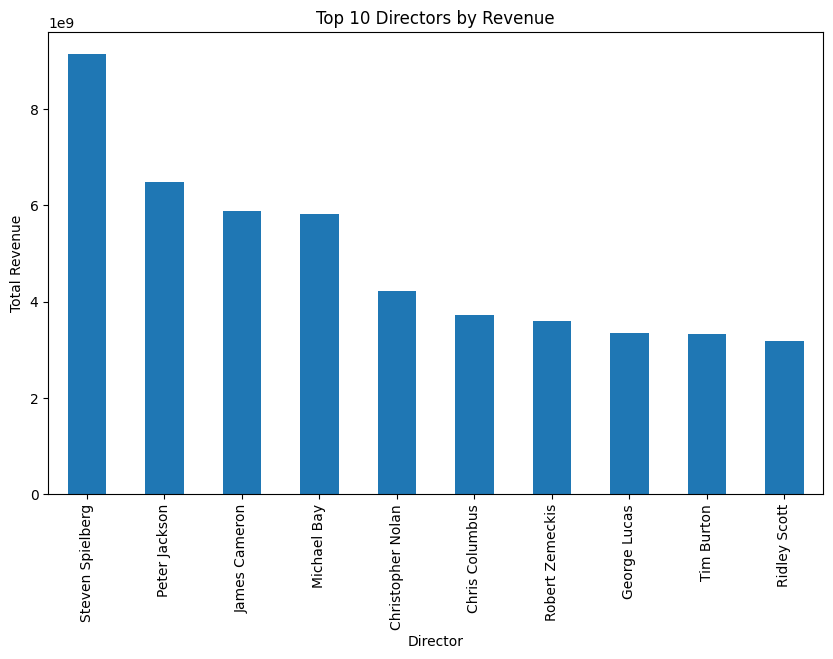

In [15]:
# Plot the success of directors
plt.figure(figsize=(10,6))
directors_highest_revenue.plot(kind='bar')
plt.title('Top 10 Directors by Revenue')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.show()


The bar graph above shows the top 10 directors in terms of total revenue generated by their movies. Steven Spielberg's movies have generated the highest revenue, followed by Peter Jackson and James Cameron.

**In conclusion, this analysis has provided valuable insights into the movie dataset. We have identified the most profitable and popular movies, analyzed the popularity of different genres and the success of different directors, and visualized various relationships in the data. These insights could be useful for a variety of purposes, such as guiding the production of future movies, informing marketing strategies, or simply providing a better understanding of the movie industry.**

## 14. Dashboard Creation

We can create a dashboard that presents all the visualizations and analyses in a user-friendly manner.

This and other future features are in the [README.md] page..